In [1]:
import pandas as pd
from tensorflow import keras
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as MSE

#### Functions

In [2]:
df = pd.read_csv('Volve production data.csv', sep =';', decimal = ',' )

filtro = df.WELL_BORE_CODE == 'NO 15/9-F-1 C'
df2 = df.loc[filtro]


data = pd.DataFrame()
columns = ['AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'AVG_CHOKE_SIZE_P','ON_STREAM_HRS']

for element in columns:
    data[element] = df2[element].astype(float)
    
data.dropna(inplace = True)

data = data.reindex(columns = ['BORE_OIL_VOL','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','AVG_CHOKE_SIZE_P','ON_STREAM_HRS','BORE_GAS_VOL', 'BORE_WAT_VOL'])

print(type(data))

data

<class 'pandas.core.frame.DataFrame'>


,BORE_OIL_VOL,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,ON_STREAM_HRS,BORE_GAS_VOL,BORE_WAT_VOL
0,0.0,0.000,0.000,0.00000,0.0,0.0,0.0
4,0.0,310.376,96.876,1.21599,0.0,0.0,0.0
5,0.0,303.501,96.923,3.08702,0.0,0.0,0.0
6,0.0,303.535,96.959,1.96237,0.0,0.0,0.0
7,0.0,303.782,96.969,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...
741,0.0,270.268,101.198,0.00000,0.0,0.0,0.0
742,0.0,276.869,101.231,0.00000,0.0,0.0,0.0
743,0.0,282.105,101.178,0.26519,0.0,0.0,0.0
744,0.0,285.096,101.131,0.00000,0.0,0.0,0.0


In [3]:
def create_dataset(timestamp, data):
    X = []
    y = []
    for i in range(timestamp,len(data)):
        
        X.append(data[i-timestamp:i])
        y.append(data[i])
        
        if i <= timestamp:
            print(len(X))
            print(X)
            print(y)
        
    return np.array(X), np.array(y)

""" 
 Para array com mais de uma dimensão  
 X.append(data_X[i-timestamp:i,0])
 y.append(data_y[i,0])
"""       

' \n Para array com mais de uma dimensão  \n X.append(data_X[i-timestamp:i,0])\n y.append(data_y[i,0])\n'

In [4]:
#NÃO RODAR!
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(np.array(data))
df_normalized = pd.DataFrame(scaler.fit_transform(np.array(data)), columns = columns)
df_normalized = df_normalized.reindex(columns = ['BORE_OIL_VOL','AVG_DOWNHOLE_PRESSURE','AVG_DOWNHOLE_TEMPERATURE','AVG_CHOKE_SIZE_P','ON_STREAM_HRS','BORE_GAS_VOL', 'BORE_WAT_VOL'])

#train_data = df_normalized.iloc[0:train_index,:].values
#test_data= df_normalized.iloc[train_index:-1,:].values

display(df_normalized)

,BORE_OIL_VOL,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_CHOKE_SIZE_P,ON_STREAM_HRS,BORE_GAS_VOL,BORE_WAT_VOL
0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.892850,0.0,0.988865,0.0,0.0,0.012986,0.0
2,0.893283,0.0,0.966961,0.0,0.0,0.032969,0.0
3,0.893615,0.0,0.967069,0.0,0.0,0.020958,0.0
4,0.893707,0.0,0.967856,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...
738,0.932683,0.0,0.861080,0.0,0.0,0.000000,0.0
739,0.932987,0.0,0.882111,0.0,0.0,0.000000,0.0
740,0.932499,0.0,0.898793,0.0,0.0,0.002832,0.0
741,0.932066,0.0,0.908322,0.0,0.0,0.000000,0.0


In [5]:
look_back = 50
test_size = 0.2

data_target = df_normalized.iloc[:,0]

train_index = int(data.shape[0]*(1-test_size))

train_data = data_target.iloc[0:train_index].values
test_data = data_target.iloc[train_index:-1].values

_, y_expected = create_dataset(look_back, test_data)

print(y_expected.shape)

1
[array([0.99687563, 0.99657149, 0.99675582, 0.99656228, 0.9963503 ,
       0.9961844 , 0.99613832, 0.99648854, 0.99665444, 0.99668209,
       0.99675582, 0.99671895, 0.99697701, 0.99720742, 0.99714291,
       0.95771507, 0.95081197, 0.94642495, 0.94264622, 0.93924536,
       0.93577999, 0.93652652, 0.93611178, 0.9351717 , 0.93423163,
       0.93340215, 0.9326464 , 0.93194595, 0.93131002, 0.93070174,
       0.93015797, 0.92965107, 0.9291626 , 0.92870178, 0.9282686 ,
       0.92788151, 0.92749442, 0.92712577, 0.92679398, 0.92648062,
       0.97841514, 0.99121675, 0.99592634, 0.99703231, 0.9969678 ,
       0.9967466 , 0.99603694, 0.99566828, 0.99538257, 0.99603694])]
[0.9964793275699988]
(98,)


In [9]:
scaler_target = MinMaxScaler(feature_range=(0, 1))
scaler_target = scaler_target.fit(y_expected.reshape(-1, 1))

# transform train
train_data_y = np.array(train_data)
test_data_y = test_data

train_data_y = train_data_y.reshape(-1, 1)
train_scaled = scaler_target.transform(train_data_y)

# transform test
test_data_y = test_data_y.reshape(-1, 1)
test_scaled = scaler_target.transform(test_data_y)

In [10]:
trainX, trainy = create_dataset(look_back, train_data)
testX, testy = create_dataset(look_back, test_data)

print(trainX.shape)

train_data = np.reshape(trainX, (trainX.shape[0], look_back, 1))

test_data = np.reshape(testX, (testX.shape[0], look_back, 1))
print(train_data.shape)
print(test_data.shape)

1
[array([0.        , 0.8928499 , 0.89328307, 0.89361486, 0.89370703,
       0.89418628, 0.89460102, 0.89324621, 0.89141214, 0.89045363,
       0.88993751, 0.94630514, 0.98019391, 0.99209231, 0.99416601,
       0.99510608, 0.99585261, 0.99587104, 0.99576045, 0.99526276,
       0.9943872 , 0.99423974, 0.99368675, 0.99348399, 0.99319828,
       0.99334574, 0.99408306, 0.9938803 , 0.99372362, 0.99167757,
       0.99246097, 0.99386186, 0.99327201, 0.99276511, 0.9929863 ,
       0.99269138, 0.9927006 , 0.99332731, 0.99435033, 0.99408306,
       0.99407384, 0.99400011, 0.99400933, 0.99414757, 0.99429504,
       0.99447936, 0.99464526, 0.99478351, 0.99025824, 0.99502313])]
[0.9951337302538202]
1
[array([0.99687563, 0.99657149, 0.99675582, 0.99656228, 0.9963503 ,
       0.9961844 , 0.99613832, 0.99648854, 0.99665444, 0.99668209,
       0.99675582, 0.99671895, 0.99697701, 0.99720742, 0.99714291,
       0.95771507, 0.95081197, 0.94642495, 0.94264622, 0.93924536,
       0.93577999, 0.93652652, 0.

In [11]:
model = Sequential()
model.add(LSTM(40, return_sequences = True, input_shape = (trainX.shape[1],1)))
model.add(LSTM(40, return_sequences = False))
model.add(Dense(20, activation = 'tanh'))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 40)            6720      
                                                                 
 lstm_1 (LSTM)               (None, 40)                12960     
                                                                 
 dense (Dense)               (None, 20)                820       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 20,521
Trainable params: 20,521
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
489/489 - 18s - loss: 0.0064 - val_loss: 0.0015 - 18s/epoch - 36ms/step
Epoch 2/10
489/489 - 13s - loss: 3.5391e-04 - val_loss: 0.0015 - 13s/epoch - 26ms/step
Epoch 3/10
489/489 - 13s - loss: 3.5440e-04 - val_loss: 0.0015 - 13s/epoch - 26ms/step
Epoch 4/10
489/489 - 14s - loss: 3.5489e-04 - val_loss: 0.0015 - 14s/epoch - 28ms/step
Epoch 5/10
489/489 - 12s - loss: 3.5536e-04 - val_loss: 0.0015 - 12s/epoch - 25ms/step
Epoch 6/10
489/489 - 12s - loss: 3.5583e-04 - val_loss: 0.0015 - 12s/epoch - 25ms/step
Epoch 7/10
489/489 - 12s - loss: 3.5628e-04 - val_loss: 0.0015 - 12s/epoch - 25ms/step
Epoch 8/10
489/489 - 13s - loss: 3.5672e-04 - val_loss: 0.0015 - 13s/epoch - 26ms/step
Epoch 9/10
489/489 - 13s - loss: 3.5715e-04 - val_loss: 0.0015 - 13s/epoch - 27ms/step
Epoch 10/10
489/489 - 12s - loss: 3.5757e-04 - val_loss: 0.0015 - 12s/epoch - 25ms/step


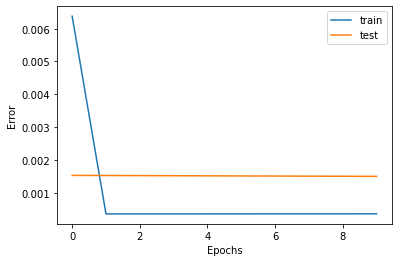

In [12]:
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

history  = model.fit(trainX,trainy, batch_size = 1, epochs = 10,  validation_split = 0.1, verbose=2, shuffle=False)

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

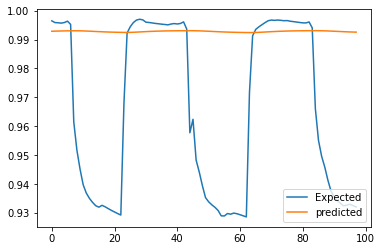

0.04001601817360096


In [13]:
y_pred = model.predict(test_data)


y_pred = scaler_target.inverse_transform(y_pred)

RMSE = MSE(y_expected,y_pred)**0.5

plt.plot(y_expected, label='Expected')
plt.plot(y_pred, label='predicted')
plt.legend(loc ='lower right')
plt.show()


print(RMSE)